In [1]:
import sys
sys.path.insert(1,'c:/code/gh/pymunk')

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
#from matplotlib import animation
#from IPython.display import HTML

In [3]:
import pymunk
from pymunk.vec2d import Vec2d

Loading chipmunk for Windows (64bit) [c:\code\gh\pymunk\pymunk\chipmunk64.dll]


In [4]:
sys.path.insert(1, "c:/code/gh/pymunk/examples")
from shapes_for_draw_demos import fill_space


In [5]:
space = pymunk.Space()
fill_space(space)


In [62]:
palette = {
    "shape_dynamic": (52,152,219,255),
    "shape_static": (149,165,166,255),
    "shape_kinematic": (39,174,96,255),
    "shape_sleeping": (114,148,168,255),
    "shape_outline": (44,62,80,255),
    "constraint": (142,68,173,255),
    "collision":(231,76,60,255),
}

def draw_options(ax):
    """Draw options for space.debug_draw() to draw a space on a ax object. 
    
    Typical usage::
    
    >>> fix, ax = matplotlib.subplot()
    >>> options = pymunk.matplotlib_util.draw_options(ax)
    >>> my_space.debug_draw(options)
    
    You can control the color of a Shape by setting shape.color to the color 
    you want it drawn in.
    
    >>> my_shape.color = (1, 0, 0, 1) # will draw my_shape in red
    
    See matplotlib_util.demo.py for a full example
    
    :Param:
        ax: matplotlib.Axes
            A matplotlib Axes object.
    
    """
    
    
    def draw_circle(pos, angle, radius, outline_color, fill_color):        
        p = plt.Circle(pos, radius, facecolor=fill_color, edgecolor=outline_color)
        ax.add_patch(p)
        
        circle_edge = pos + Vec2d(radius, 0).rotated(angle)
        line = plt.Line2D([pos.x, circle_edge.x], [pos.y, circle_edge.y], linewidth=1, color=outline_color)
        line.set_solid_capstyle("round")
        ax.add_line(line)

    def draw_segment(a, b, color):
        line = plt.Line2D([a.x, b.x], [a.y, b.y], linewidth=1, color=color)
        line.set_solid_capstyle("round")
        ax.add_line(line)

    def draw_fat_segment(a, b, radius, outline_color, fill_color):
        line = plt.Line2D([a.x, b.x], [a.y, b.y], linewidth=radius, color=fill_color)
        line.set_solid_capstyle("round")
        ax.add_line(line)
        
    def draw_polygon(verts, radius, outline_color, fill_color):
        radius = max(1,radius)
        p = plt.Polygon(verts, linewidth=radius, joinstyle="round", facecolor=fill_color, edgecolor=outline_color)
        ax.add_patch(p)
        
    def draw_dot(size, pos, color):
        p = plt.Circle(pos, size, facecolor=color, edgecolor='None')
        ax.add_patch(p)
        
    def _c(c):
        return c[0]/255.,c[1]/255.,c[2]/255.,c[3]/255.
    
    def color_for_shape(shape):
        
        if hasattr(shape, "color"):
            color = [0,0,0,1]
            for i in range(len(shape.color)):
                if shape.color[i]>1:
                    color[i] = shape.color[i]/255.
                else:
                    color[i] = shape.color[i]
            return color
        
        color = palette["shape_dynamic"]
        if shape.body != None:
            if shape.body.body_type == pymunk.Body.STATIC:
                color = palette["shape_static"]
            elif shape.body.body_type == pymunk.Body.KINEMATIC:
                color = palette["shape_kinematic"]
            elif shape.body.is_sleeping:
                color = palette["shape_sleeping"]
        
        return _c(color)
        
    flags = pymunk.SpaceDebugDrawOptions.DRAW_SHAPES | \
            pymunk.SpaceDebugDrawOptions.DRAW_CONSTRAINTS | \
            pymunk.SpaceDebugDrawOptions.DRAW_COLLISION_POINTS

    options = pymunk.SpaceDebugDrawOptions(
        draw_circle=draw_circle,
        draw_segment=draw_segment,
        draw_fat_segment=draw_fat_segment,
        draw_polygon=draw_polygon,
        draw_dot=draw_dot,
        flags=flags,
        shape_outline_color=_c(palette["shape_outline"]),
        color_for_shape=color_for_shape,
        constraint_color=_c(palette["constraint"]),
        collision_point_color=_c(palette["collision"]),
    )
    return options



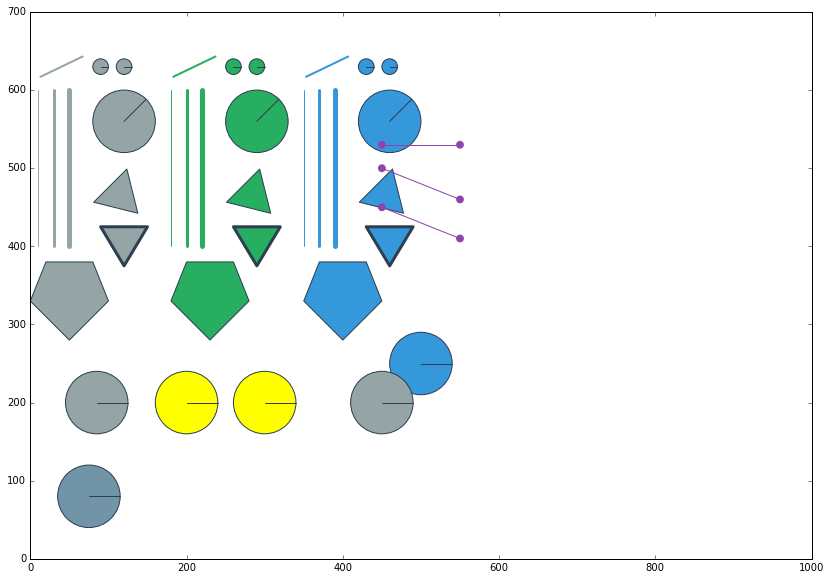

In [65]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(xlim=(0, 1000), ylim=(0, 700))
ax.set_aspect("equal")
o = draw_options(ax)
space.debug_draw(o)

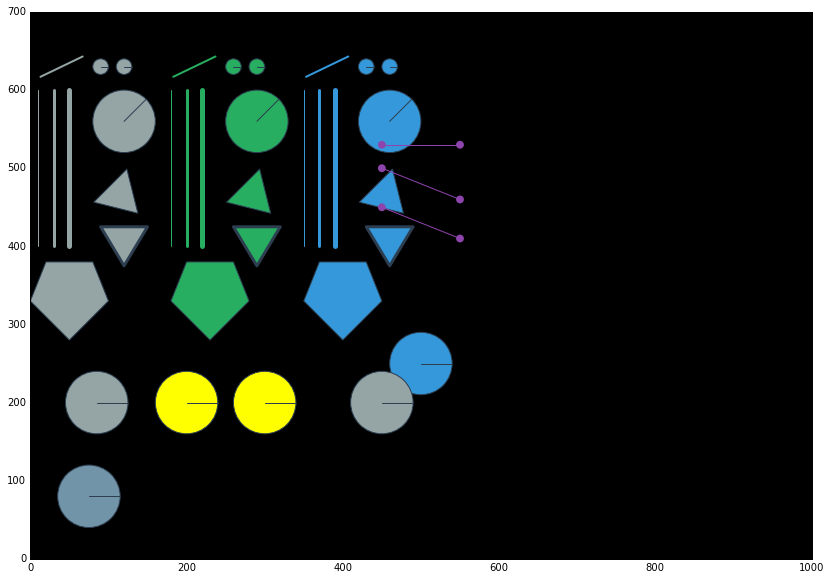

In [66]:
fig = plt.figure(figsize=(14,10))
ax = plt.axes(xlim=(0, 1000), ylim=(0, 700))
ax.set_aspect("equal")
ax.set_axis_bgcolor((0,0,0))
o = draw_options(ax)
space.debug_draw(o)

In [86]:
class A(object):
    z = 100
    
    def __init__(self):
        print("init")
    def __enter__(self):
        print("enter")
    def __exit__(self, type, value, traceback):
        print("exit")
        

In [87]:
a = A()
with a:
    print(a.z)

init
enter
100
exit
